Project 1: Exploratory Data Analysis - Gapminder dataset

The Gapminder dataset provides populaion data from 1952 to 2007 (at S year inlevals) tor several countres around the world. Compare the populations of the European countries France, United Kingdom, ltaly, Germany and spain over this perlod using a line chart Make approprlate modllikrtlons to the chart title, axis tiles, legend, figure size, font size, colors etc to make the chart readable and visually appealing - #Line Chart

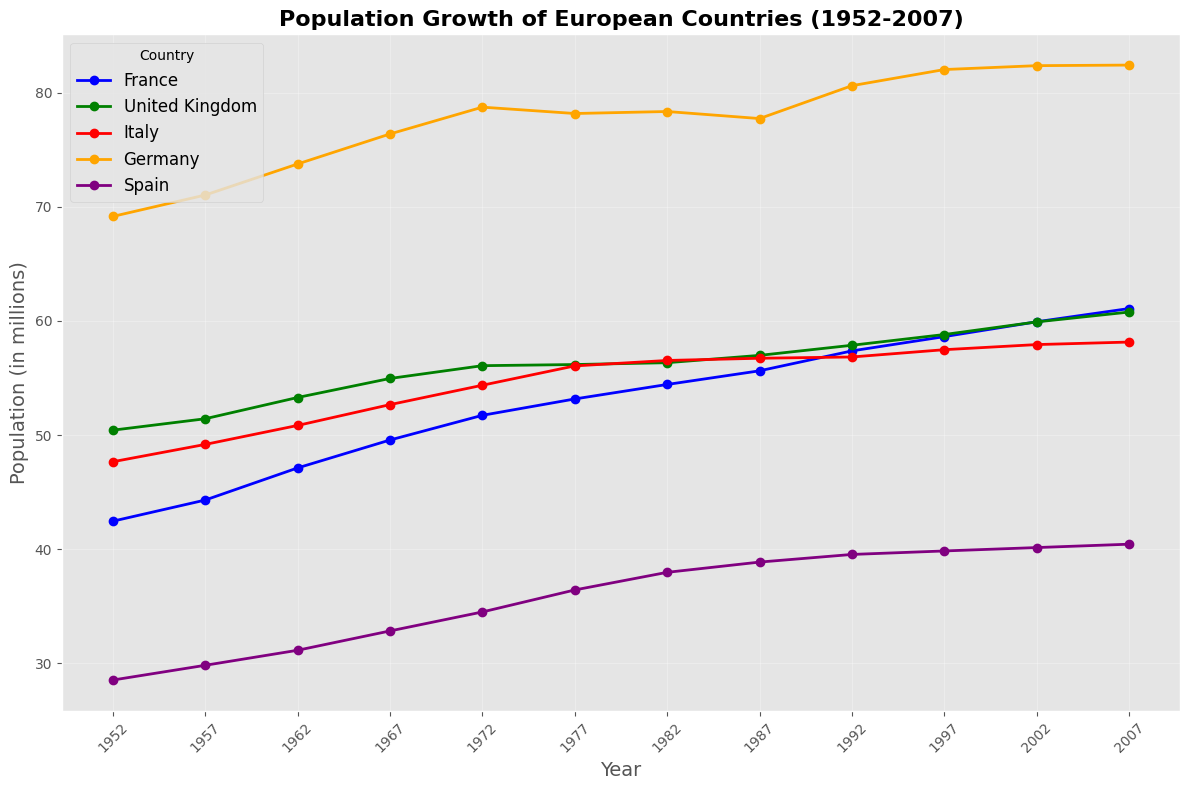

In [5]:
import matplotlib.pyplot as plt

countries = ['France', 'United Kingdom', 'Italy', 'Germany', 'Spain']
population_df = pd.read_csv('../datasets/gapminderDataFiveYear.csv')
population_df['pop_millions'] = population_df['pop'] / 1e6
filtered_df = population_df[population_df['country'].isin(countries)]

pivot_df = filtered_df.pivot(index='year', columns='country', values='pop_millions')

plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'red', 'orange', 'purple']
for i, country in enumerate(countries):
    plt.plot(pivot_df.index, pivot_df[country], label=country, color=colors[i], marker='o', linewidth=2)

plt.title('Population Growth of European Countries (1952-2007)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Population (in millions)', fontsize=14)
plt.legend(title='Country', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(pivot_df.index, rotation=45)
plt.tight_layout()

plt.show()

Project 2: Exploratory Data Analysis - Diamonds dataset

diamonds_url points to a CSV file containing varnous attrbutes like carat, cut, color, clarly, prlce etc, for over 53, 000 dlamonds, Visualize the relationship between, the carat (size of diamond)and price using a scatter plot Instead of using the enlire dataset for this visuallzatlon, just plck the dlamonds wilth a clarily "SI2" and color "E", Use the values of the "'caut' column to color th dols in the scatter plot Make appropriate modiications to the chart title, axls ttleos, legend, igure slze, font slze, colors ete, to make the chart readable and visually appealing # Scatterplot

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


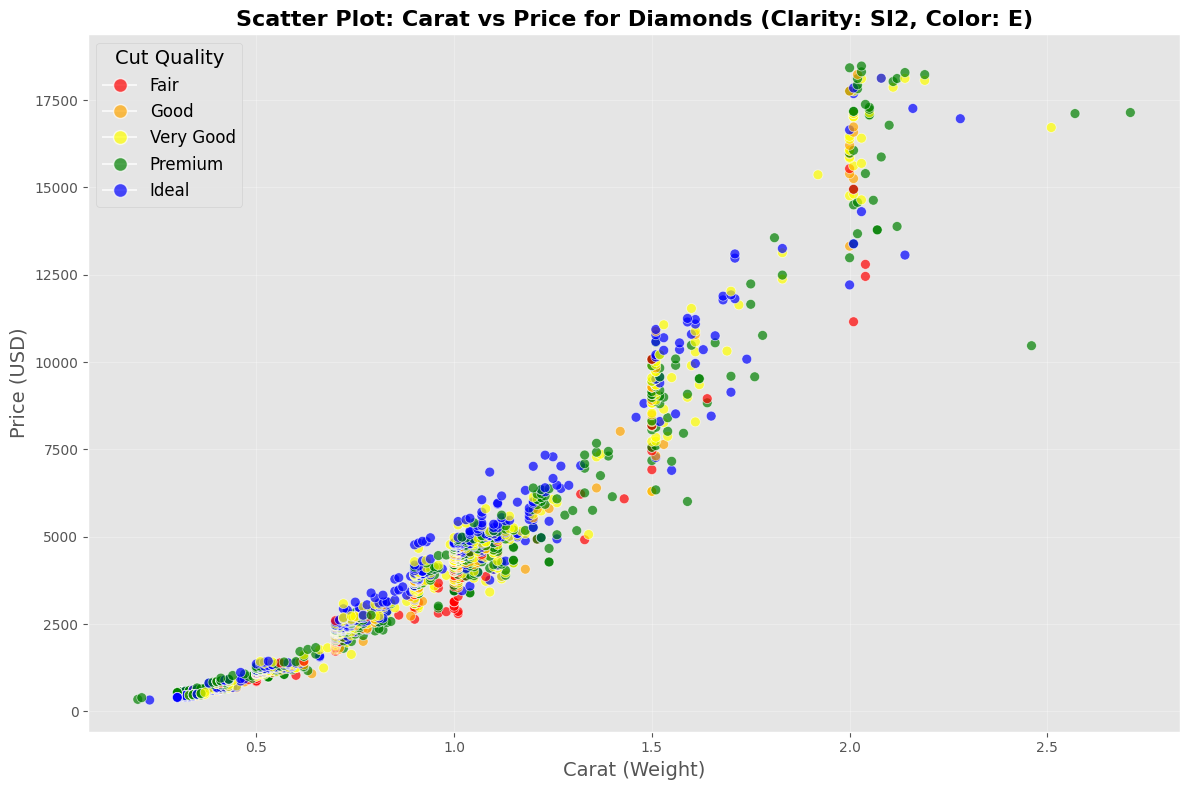

In [7]:
import pandas as pd
file_path2 = '../datasets/diamonds.csv'
diamond_df = pd.read_csv(file_path2)
print(diamond_df)

import matplotlib.pyplot as plt

# Filter the diamonds dataset for clarity 'SI2' and color 'E'
filtered_diamonds = diamond_df[(diamond_df['clarity'] == 'SI2') & (diamond_df['color'] == 'E')]

# Define colors for each cut category
cut_colors = {'Fair': 'red', 'Good': 'orange', 'Very Good': 'yellow', 'Premium': 'green', 'Ideal': 'blue'}
colors = filtered_diamonds['cut'].map(cut_colors)

# Create the scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(filtered_diamonds['carat'], filtered_diamonds['price'], c=colors, alpha=0.7, edgecolors='w', s=50)

# Create legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, alpha=0.7) for color in cut_colors.values()]
plt.legend(handles, cut_colors.keys(), title='Cut Quality', fontsize=12, title_fontsize=14)

# Customize the plot
plt.title('Scatter Plot: Carat vs Price for Diamonds (Clarity: SI2, Color: E)', fontsize=16, fontweight='bold')
plt.xlabel('Carat (Weight)', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

Project 3: Exploratory Data Analysis - Planets dataset

The Planets dataset contains details about the 1,000+ extrasolar planets discovered up to 2014. Visualize the distribution of the masses of the planets (expressed as a multiple of the mass of Jupiter), using a histogram and a box plot. Make appropriate modifications to the chart title, axis titles, legend, figure size, font size, colors etc. to make the chart readable and visually appealing. - Histogram and Box Plot




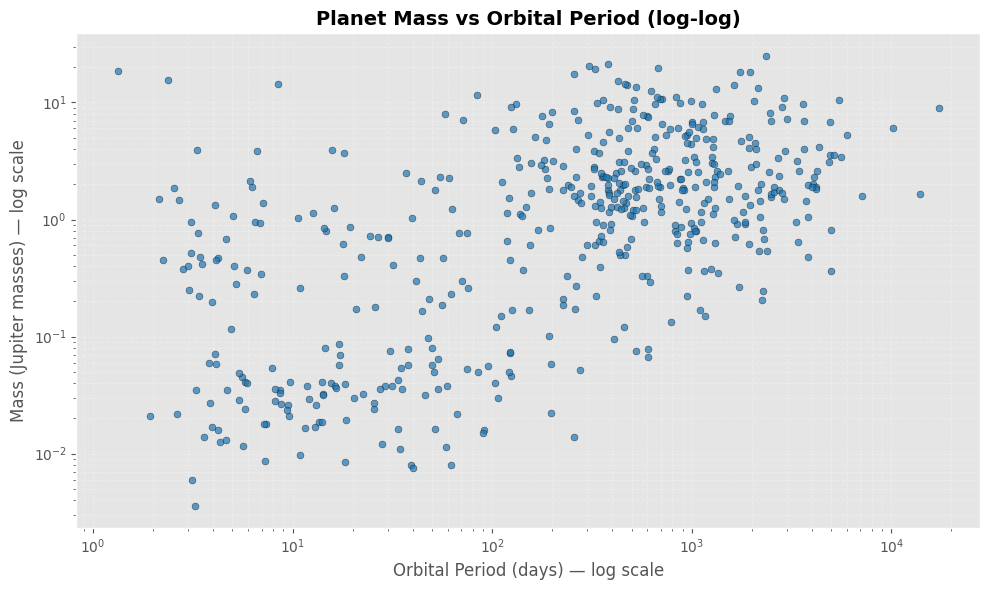


Data points plotted: 513


In [ ]:
# Project 3 (concise): Planets — Histogram and Boxplot of Mass
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../datasets/planets.csv')
dfp = df.dropna(subset=['mass']).copy()

# Select top 6 discovery methods for boxplot
top_methods = dfp['method'].value_counts().nlargest(6).index.tolist()
box_data = [dfp[dfp['method'] == m]['mass'] for m in top_methods]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram (log x)
axes[0].hist(dfp['mass'], bins=30, color='tab:blue', alpha=0.8)
axes[0].set_xscale('log')
axes[0].set_title('Histogram of Planet Mass (log scale)', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Mass (Jupiter masses)')
axes[0].set_ylabel('Count')

# Boxplot by discovery method (log y)
axes[1].boxplot(box_data, labels=top_methods, patch_artist=True,
                boxprops=dict(facecolor='tab:orange', color='k'))
axes[1].set_yscale('log')
axes[1].set_title('Mass by Discovery Method (top 6)', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Mass (Jupiter masses)')
axes[1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

print('\nPlotted points (mass):', len(dfp))